&copy; 2016 Roberts Lab @ Johns Hopkins University, eroberts@jhu.edu. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>. <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
***

# AS.250.313 Fall 2016
# Lab1 Handout

Due September 19 in lab. Submit your completed script and its output for each of the problems.

## Lab assignment

In this lab we will be learning how to integrate ordinary differential equations (ODEs) using SciPy, a science-focused library for Python. You are also free to use a different numerical package, just submit equivalent plots and scripts in answer to the problems.

### Introduction to solving ODEs using SciPy

SciPy has a number of built-in functions for solving systems of ODEs. The most general purpose of these is scipy.integrate.odeint. There are several other solvers available, but odeint is a reasonable starting point. All of the solvers solve problems of the form

$$\frac{dx}{dt}=f(t,x),\quad x({t}_{0})={x}_{0}$$

where t is the independent variable and x is a vector of dependent variables.

### First order reactions

### Problem 1
#### Explanation and example
Consider the reaction $X→∅$ with a rate constant $k$. Given a starting concentration of $X={X}_{0}$, we would like to know what the concentration is at some later time $t$. Let’s solve the problem numerically.
- Run the following code to initialize the IPython plotting environment (it's how we make the pretty pictures). You only need to run this code once per session with an IPython notebook
  - If you are unfamiliar with the IPython notebook environment, look at the `Keyboard shortcuts` in the `Help` menu. This will give you all the information you need about editing and running code in a notebook
  - Lines that start with `#` are comments. When a block of code is run, comment lines are not exectued. They can contain anything, and are usually used to give helpful information about nearby code

In [2]:
# This line sets up the plotting environment for this notebook, as well as importing a few useful packages

%pylab inline

# This line sets some default values for the `matplotlib` plotting library
# these will help to make our future plots prettier
#     font.size: controls the size of the fonts on displayed plots
#     axes.formatter.limits: controls how `matplotlib` decides to use standard or scientific notation when displaying labels

matplotlib.rcParams.update({'font.size': 20, 'axes.formatter.limits':(-4,4)})

Populating the interactive namespace from numpy and matplotlib


- Carefully read through the following code block and comments

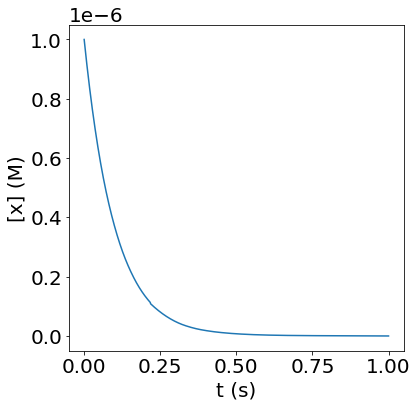

In [3]:
# First, we import the scipy.integrate package so that we can use its odeint function later on. 
# The `as snt` part at the end of the line allows use to refer to the package using the short alias `snt`

import scipy.integrate as snt

# Now we set up some parameters for our system

k = 10
x0 = 1e-6
ti = 0
tf = 1

# In order to solve the time dependent concentration, X(t), we need to call an ODE solver and pass 
# it in a function that can calculate the derivative dX/dt= -kx. We will define a standard Python 
# function (which we will call `rate`) for this purpose

def rate(x,t):
    return -k*x

# Use the `linspace` function from the `numpy` library to generate an array of 1000 timepoints, 
# evenly spaced from ti to tf (inclusive). By running `%pylab inline` earlier, `numpy` has already been
# automatically imported, and can be referred to either as `numpy` or by its standard alias `np`

t = np.linspace(ti, tf, 1000)

# The next line of code calls odeint, our ODE solver. The first parameter is the handle to a 
# function that calculates the derivatives at a given time and system state. The second parameter 
# is the initial state of the system. The third parameter is an array of time steps at which the 
# integration should be performed 

x = snt.odeint(rate, x0, t)

# The remaining lines plot the data
# First we initialize a figure. `plt` is the standard alias for matplotlib.pyplot

fig = plt.figure(figsize=(6,6))

# Now we initialize a set of axes. The axes are what we use to do the actual plotting

ax = fig.gca()

# Make a standard x-y line plot

ax.plot(t, x)

# Label the plot

ax.set_xlabel('t (s)')
ax.set_ylabel('[x] (M)');

- When you think you understand what every line of code is doing, run the code block above in order to simulate the first order reaction $X→∅$

#### Assignment

Change the rate constant to $10\,{s}^{-1}$ and the time interval to be approximately ten times the new half-life and rerun the script. Turn in your plot with the new settings.

### Problem 2
#### Explanation and example
Consider the coupled reactions $X→Y$ and $Y→X$ with rate constants ${k}_{1}$ and ${k}_{2}$, respectively. Given the starting concentration of $X={X}_{0}$ and $Y=0$ we would like to know what the concentration is at some later time $t$.

- Just like in the last exercise, read over and understand the code before you run it.
- The big difference this time is that we have two coupled rate equations. This means that in our code we now have a `rates` function instead of a `rate` function. The x parameter in `rates` is now an array containing one element for each variable in the coupled system of equations. Likewise, the return value is an array of the same length.

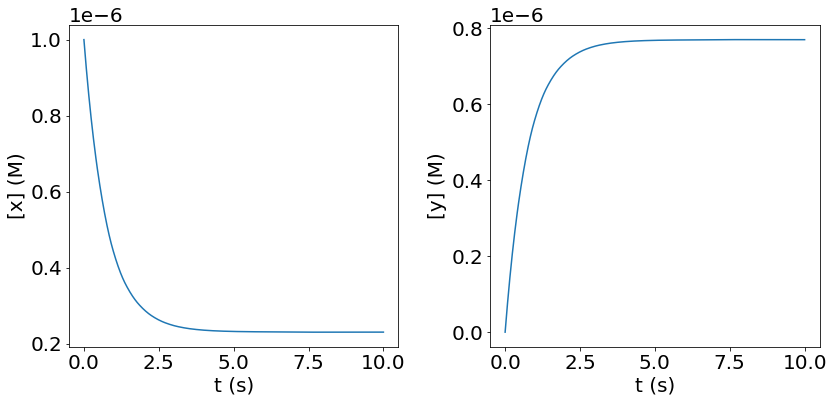

In [4]:
import scipy.integrate as snt
k1 = 1
k2 = .3
x0 = [1e-6, 0]
ti = 0
tf = 10

# `rates` is similar to the `rate` function from the first problem. The big difference is that both the input
# parameter x and the return value are now arrays instead of single values.

def rates(x,t):
    '''
    x[0] is x
    x[1] is y
    '''
    return np.array([-k1*x[0] + k2*x[1], 
                     k1*x[0] - k2*x[1]])

t = np.linspace(ti, tf, 1000)
x = snt.odeint(rates, x0, t)

# We make a list of labels that we will use with our plots later on.

labels = ['x', 'y']

# This time we want to make two plots (one for [x] vs time and one for [y] vs time).
# The `subplots` function initializes a single figure with multiple axes

fig, axArr = plt.subplots(1, 2)

# Set the overall size of the figure

fig.set_size_inches(12,6)

# When you run the enumerate function on a list of values, it generates the corresponding indices.
# The following `for` loop will run two times.
# The first time through the loop, i=0 and ax=subAxes0
# The second time through the loop, i=1 and ax=subAxes1

for i,ax in enumerate(axArr):
    ax.plot(t, x[:,i])
    ax.set_xlabel('t (s)')
    
    # '%s' is a special string that string substitution can act on. For example, running 
    #     'The %s jumps over the moon' % cow
    # would return 'The cow jumps over the moon', whereas running
    #     'The %s %s over the %s' % ('man', 'trips', 'dog')
    # would return 'The man trips over the dog'
    ax.set_ylabel('[%s] (M)' % labels[i])
    
# the tight_layout function helps to fix up spacing issues with plots and subplots

fig.tight_layout()

- Once you've run the code, you should get two plots of $x$ and $y$ versus $t$. 
- We used the subplots command to make multiple plots side-by-side in one figure. You can find out more about this and many other Python functions by using the help function.

In [5]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.
    
        Whe

#### Assignment
Figure out a set of rate constant that will give the equilibrium value $X$ to be $\frac{{X}_{0}}{4}$. Rerun the simulation with the new rate constants and turn in your plot.

### Second order reactions

### Problem 3
Consider the coupled reactions $L+P→PL$ and $PL→L+P$ with rate constants ${k}_{on}$ and ${k}_{off}$, respectively. Here the second order reaction has a rate proportional to the product of $L$ and $P$: 

$$\frac{dP}{dt} = {-k}_{on}∙P∙L$$

Figure out the additional terms for the rate equation and numerically solve it versus time for ${k}_{off}=0.2\;{s}^{-1}$ and and ${k}_{D}=1e-7\;M$ (the notation $1e-7$ is shorthand for $1\times{10}^{-7}$). Use an initial concentration of $2e-6\;M$ for both $P$ and $L$. Run your simulation out to equilibrium, i.e., until the values of $P$, $L$, and $PL$ stop changing.

- You will probably need to make a slight adjustment to your previous code to get reliable results:

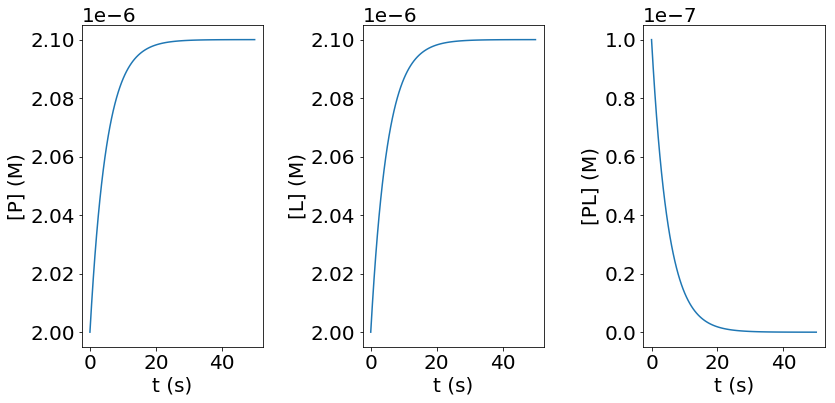

In [6]:
PL0 = [2e-6, 2e-6, 1e-7]
koff = .2
kon = 1
ti = 0
tf = 50


t = np.linspace(ti, tf, 100)

def rates(PL,t):
    '''
    x[0] is x
    x[1] is y
    '''
    return np.array([-kon*PL[0]*PL[1] + koff*PL[2], 
                    -kon*PL[1]*PL[0] + koff*PL[2], 
                    kon*PL[0]*PL[1] -PL[2]*koff])


x = snt.odeint(rates, PL0, t, hmax=1e-1)

labels = ['P', 'L', 'PL']

# This time we want to make two plots (one for [x] vs time and one for [y] vs time).
# The `subplots` function initializes a single figure with multiple axes

fig, axArr = plt.subplots(1, 3)

# Set the overall size of the figure

fig.set_size_inches(12,6)

# When you run the enumerate function on a list of values, it generates the corresponding indices.
# The following `for` loop will run two times.
# The first time through the loop, i=0 and ax=subAxes0
# The second time through the loop, i=1 and ax=subAxes1

for i,ax in enumerate(axArr):
    ax.plot(t, x[:,i])
    ax.set_xlabel('t (s)')
    
    # '%s' is a special string that string substitution can act on. For example, running 
    #     'The %s jumps over the moon' % cow
    # would return 'The cow jumps over the moon', whereas running
    #     'The %s %s over the %s' % ('man', 'trips', 'dog')
    # would return 'The man trips over the dog'
    ax.set_ylabel('[%s] (M)' % labels[i])
    
# the tight_layout function helps to fix up spacing issues with plots and subplots

fig.tight_layout()

# in place of
# x = snt.odeint(rates, x0, t)

# in general, if odeint seems to be producing strange results, try a couple of different values of hmax, 
# ie hmax=1e-1, hmax=1e-2, etc

#### Assignment
Turn in both your code and a plot of $P$, $L$, and $PL$ versus $t$. Use the SciPy documentation and/or the Internet to figure out what the `hmax` parameter does and why it helped your simulation.

<BR>
<BR>
<BR>
<BR>
<BR>
<BR>
<BR>

## Homework assignments

### Problem 4
Consider an enzyme and substrate pair with a binding ${k}_{on}=1e8\;{M}^{-1}{s}^{-1}$, ${k}_{off}=1\;{s}^{-1}$ and ${k}_{cat}=100\;{s}^{-1}$. If we have $1e-7\;M$ protein, $1e-5\;M$ substrate, and $0\;M$ product initially, calculate the $[S]$ and $[P]$ as a function of time between 0 and 2 seconds. Turn in your script and plot.

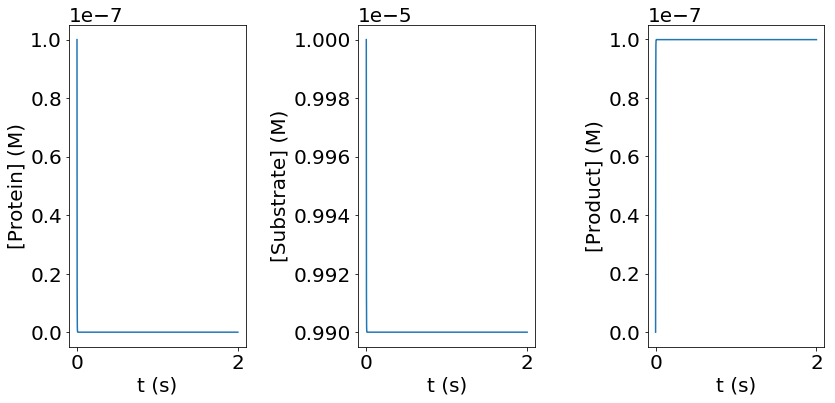

In [16]:
kon = 1e8
koff = 1
kcat = 100
x0 = [1e-7, 1e-5, 0]
ti = 0
tf = 2

t = np.linspace(ti, tf, 1000)

def rates(x, t):
    return np.asarray([-kon*x[0]*x[1] + koff*x[2],
                       -kon*x[0]*x[1] + koff*x[2],
                      kon*x[0]*x[1] - koff*x[2]])

x = snt.odeint(rates, x0, t, hmax = 1e-5)

labels = ['Protein', 'Substrate', 'Product']

fig, axArr = plt.subplots(1, 3)

# Set the overall size of the figure

fig.set_size_inches(12,6)

# When you run the enumerate function on a list of values, it generates the corresponding indices.
# The following `for` loop will run two times.
# The first time through the loop, i=0 and ax=subAxes0
# The second time through the loop, i=1 and ax=subAxes1

for i,ax in enumerate(axArr):
    ax.plot(t, x[:,i])
    ax.set_xlabel('t (s)')
    
    # '%s' is a special string that string substitution can act on. For example, running 
    #     'The %s jumps over the moon' % cow
    # would return 'The cow jumps over the moon', whereas running
    #     'The %s %s over the %s' % ('man', 'trips', 'dog')
    # would return 'The man trips over the dog'
    ax.set_ylabel('[%s] (M)' % labels[i])
    
# the tight_layout function helps to fix up spacing issues with plots and subplots

fig.tight_layout()

# in place of
# x = snt.odeint(rates, x0, t)

# in general, if odeint seems to be producing strange results, try a couple of different values of hmax, 
# ie hmax=1e-1, hmax=1e-2, etc



### Problem 5
Consider the same enzyme system as in problem 4 but with the addition of substrate inhibition modeled as $ES+S→ESS$ and $ESS→ES+S$, with rates ${{k}_{i}}_{on}$ and ${{k}_{i}}_{off}$.

#### Part a
Plot the $[S]$ and $[P]$ as a function of time between 0 and 2 seconds for ${{k}_{i}}_{on} = {k}_{on}$ and ${{k}_{i}}_{off} = {k}_{off}$ for $[S] = 1e-5$. Turn in your plot and code.

#### Part b
Plot the reaction rate (v) versus substrate concentration. (This will require you to perform and analyze many independent simulations.) Turn in your plot and code.

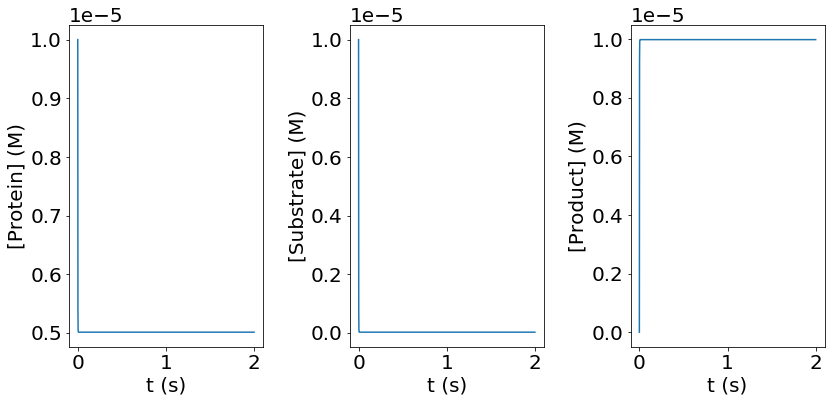

In [18]:
kon = 1e8
koff = 1
kion = kon
kioff = koff
kcat = 100
x0 = [1e-5, 1e-5, 0]
ti = 0
tf = 2

t = np.linspace(ti, tf, 1000)

def rates(x, t):
    return np.asarray([-kon*x[0]*x[1] + koff*x[2],
                       -kon*x[0]*x[1] + koff*x[2] - kion*x[1]*x[0] + kioff*x[2],
                      kon*x[0]*x[1] - koff*x[2] + kion*x[1]*x[0] - kioff*x[2]])

x = snt.odeint(rates, x0, t, hmax = 1e-5)

labels = ['Protein', 'Substrate', 'Product']

fig, axArr = plt.subplots(1, 3)

# Set the overall size of the figure

fig.set_size_inches(12,6)

# When you run the enumerate function on a list of values, it generates the corresponding indices.
# The following `for` loop will run two times.
# The first time through the loop, i=0 and ax=subAxes0
# The second time through the loop, i=1 and ax=subAxes1

for i,ax in enumerate(axArr):
    ax.plot(t, x[:,i])
    ax.set_xlabel('t (s)')
    
    # '%s' is a special string that string substitution can act on. For example, running 
    #     'The %s jumps over the moon' % cow
    # would return 'The cow jumps over the moon', whereas running
    #     'The %s %s over the %s' % ('man', 'trips', 'dog')
    # would return 'The man trips over the dog'
    ax.set_ylabel('[%s] (M)' % labels[i])
    
# the tight_layout function helps to fix up spacing issues with plots and subplots

fig.tight_layout()

# in place of
# x = snt.odeint(rates, x0, t)

# in general, if odeint seems to be producing strange results, try a couple of different values of hmax, 
# ie hmax=1e-1, hmax=1e-2, etc

In [34]:
kon = 1e8
koff = 1
kion = kon
kioff = koff
kcat = 100
x = np.asarray([[1e-5], [1e-5], [0]])
print(x)

for i in range(1,50):
    np.append(x[0], x[0,i-1] + .1*x[0,i-1], axis = 3)
    np.append(x[1], x[1,i-1] + .1*x[1,i-1], axis = 3)
    np.append(x[2], x[2,i-1] + .1*x[2,i-1], axis = 3)
        
        
def rates(x):
    return np.asarray([-kon*x[0]*x[1] + koff*x[2],
                       -kon*x[0]*x[1] + koff*x[2] - kion*x[1]*x[0] + kioff*x[2],
                        kon*x[0]*x[1] - koff*x[2] + kion*x[1]*x[0] - kioff*x[2]])


y = np.asarray([x[0][0], x[1][0], x[2][0]])
for i in range(1,len(x[0])):
    np.append(y[i,:], rates([x[0][i-1], x[1][i-1], x[2][i-1]]))
    
    

labels = ['enzyme', 'substrate', 'product']

fig, axArr = plt.subplots(3, 3)

# Set the overall size of the figure

fig.set_size_inches(12,6)

# When you run the enumerate function on a list of values, it generates the corresponding indices.
# The following `for` loop will run two times.
# The first time through the loop, i=0 and ax=subAxes0
# The second time through the loop, i=1 and ax=subAxes1
num = 0
for i,ax in enumerate(axArr):
    ax.plot(x[num][i], y[:,i])
    ax.set_xlabel('t (s)')
    
    # '%s' is a special string that string substitution can act on. For example, running 
    #     'The %s jumps over the moon' % cow
    # would return 'The cow jumps over the moon', whereas running
    #     'The %s %s over the %s' % ('man', 'trips', 'dog')
    # would return 'The man trips over the dog'
    ax.set_ylabel('[%s] (M)' % labels[i])
    num = num +1
    
# the tight_layout function helps to fix up spacing issues with plots and subplots

fig.tight_layout()

# in place of
# x = snt.odeint(rates, x0, t)

# in general, if odeint seems to be producing strange results, try a couple of different values of hmax, 
# ie hmax=1e-1, hmax=1e-2, etc

TypeError: 'tuple' object is not callable